In [9]:
import sys
sys.path.append('..')

import highSieve as hs
import sieveOfEratosthenes as soe

from math import log
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# list of primes to use as sieve
primes = soe.run(10000)

In [41]:
def testSieve(prime_list: list, l: int, k: int) -> pd.DataFrame:
    """
    prime_list - primes to sieve high number interval
    l - lower bound to sieve
    u - upper bound to sieve
    """

    # pp is the ratio of primes found on interval to size of interval
    psuedo_primes = hs.run(prime_list, l, l + k, 60)
    pp = len(psuedo_primes) / k
    
    # pnc is ratio of expected primes to be found on interval based on Prime Number Theorem
    pnc = 1 / log(l + k)
    
    return abs(pnc - pp)

In [54]:
error = list()
lower_bound = list()

x = 10000000000

for i in range (1, 100):
    
    d = 10000

    error.append(testSieve(primes, x, d))
    lower_bound.append(x)

    x += d

df = pd.DataFrame({'lower_bound': lower_bound, 'error': error})
df

,lower_bound,error
0,10000000000,0.002829
1,10000010000,0.003871
2,10000020000,0.000729
3,10000030000,0.000171
4,10000040000,0.002229
...,...,...
94,10000940000,0.002471
95,10000950000,0.000229
96,10000960000,0.000129
97,10000970000,0.000429


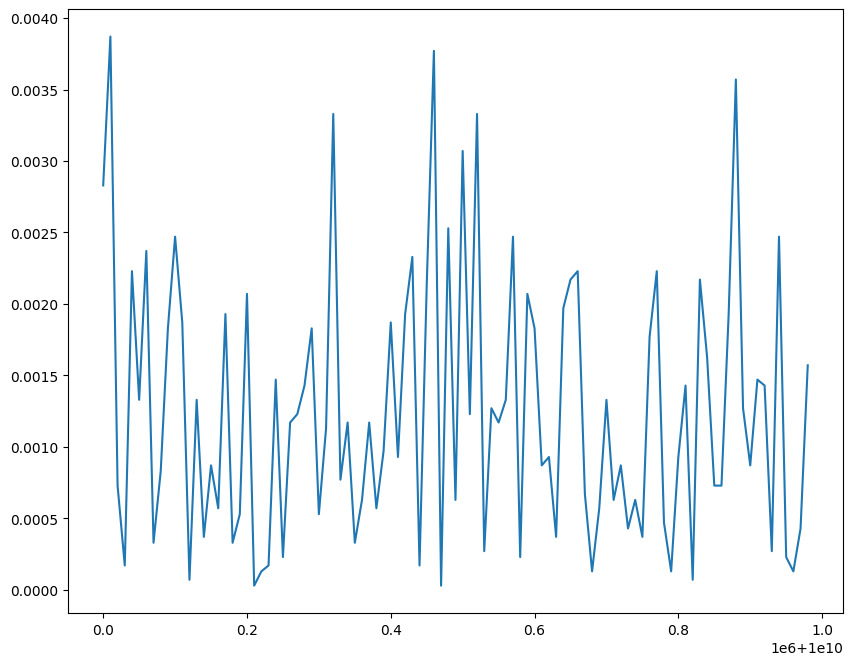

In [55]:
plt.figure(figsize=(10, 8), dpi=100)
plt.plot(df['lower_bound'], df['error'])
plt.show()

In [56]:
df.describe()

,lower_bound,error
count,9.900000e+01,99.000000
mean,1.000049e+10,0.001252
std,2.872281e+05,0.000933
min,1.000000e+10,0.000029
25%,1.000024e+10,0.000500
50%,1.000049e+10,0.001171
75%,1.000074e+10,0.001900
max,1.000098e+10,0.003871
